In [2]:
from fastai.vision.all import *
from pathlib import Path

In [3]:
path = Path('C:/Users/alika/Desktop/Deep learning/Projects/coke-vs-pepsi-classifier/data')

In [4]:
((path/'train_images').ls())[1]

Path('C:/Users/alika/Desktop/Deep learning/Projects/coke-vs-pepsi-classifier/data/train_images/new_cola (10).jpg.jpg')

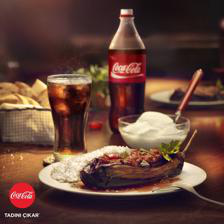

In [5]:
Image.open(((path/'train_images').ls())[10])

# Create dataloader

### We use regex to find photo's label

In [6]:
text = "new_cola (10).jpg"
re.findall(r'_(\w+)\s*\(', text)


['cola']

In [ ]:
data_block = DataBlock(
                        blocks=(ImageBlock, CategoryBlock),

                        # We only use the train folder to create the dataset
                        get_items=get_image_files,

                        # We randomly split the train folder into two parts: training and validation
                        splitter=RandomSplitter(valid_pct=0.2, seed=42),

                        # We get the label from the file name
                        get_y=using_attr(RegexLabeller(r'_(\w+)\s*\('), 'name'),

                        item_tfms=Resize(460),
                        batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

# we use summery to find error in dataloader
data_block.summary(path/'train_images')

Setting-up type transforms pipelines
Found 470 items
2 datasets of sizes 376,94
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}


Building one sample
  Pipeline: PILBase.create
    starting from
      C:\Users\alika\Desktop\Deep learning\Projects\coke-vs-pepsi-classifier\data\train_images\new_cola (99).jpg.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=224x224
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

    starting from
      C:\Users\alika\Desktop\Deep learning\Projects\coke-vs-pepsi-classifier\data\train_images\new_cola (99).jpg.jpg
    applying partial gives
      cola
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
 gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=224x224, TensorCategory(0))


Found 470 items
2 datasets of sizes 376,94
Setting up Pipeline: PILBase.create
Setting up Pipeline: part

In [ ]:
#Give train dataset to dataloder
dls = data_block.dataloaders(path/'train_images')

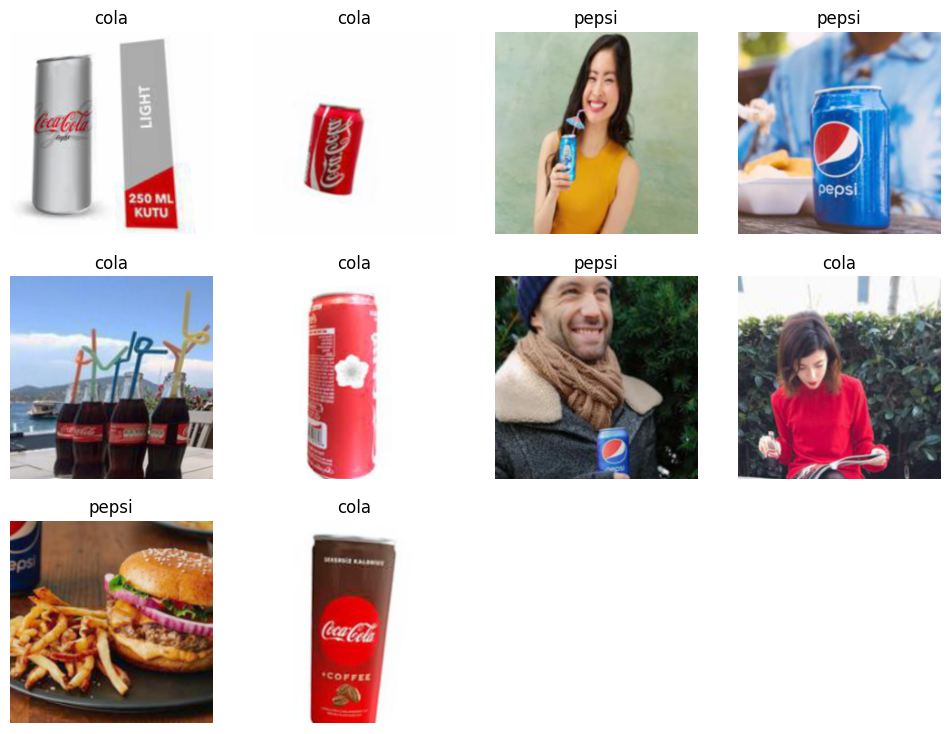

In [ ]:
#check some photo's label
dls.show_batch(max_n = 10, nrows = 3)

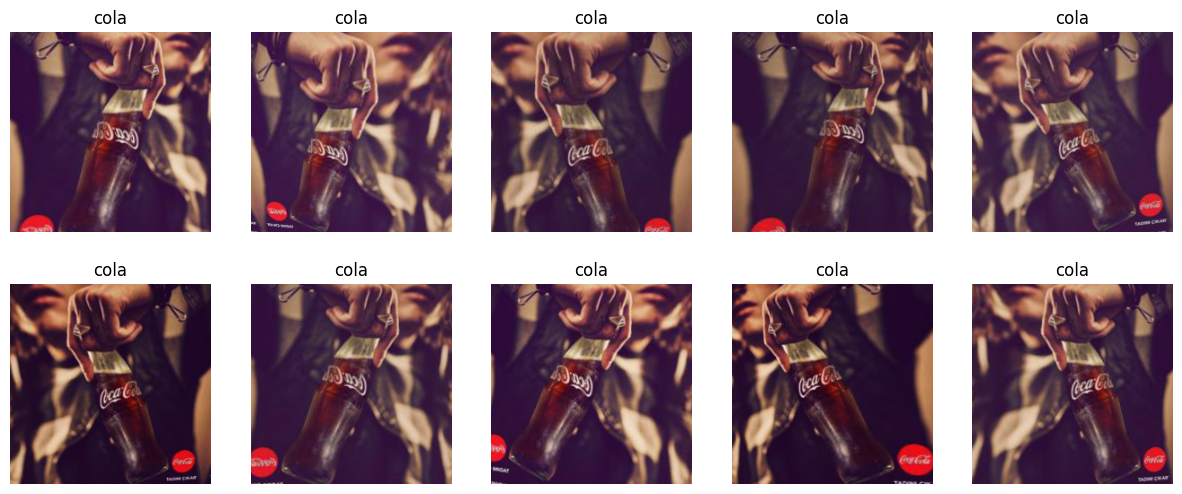

In [ ]:
#Here, we used unique=True to have the same image repeated with different versions of this RandomResizedCrop transform.
dls.train.show_batch(max_n = 10, nrows = 2, unique = True)

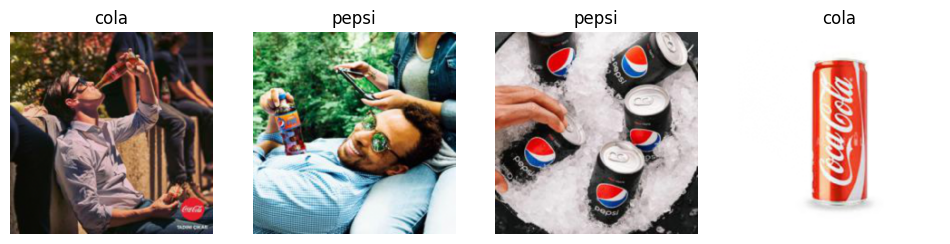

In [ ]:
#Show some validation data
dls.valid.show_batch(max_n=4, nrows=1)

# Create Learner

### We use resnet34 as our transformer model

In [14]:
learner = vision_learner(dls , resnet34, metrics = error_rate)

In [15]:
x,y = dls.one_batch()

In [16]:
y

TensorCategory([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
                0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
                1])

In [17]:
preds = learner.get_preds(dl = [(x,y)])
preds[0]

tensor([[8.9870e-01, 1.0130e-01],
        [5.7785e-01, 4.2215e-01],
        [9.9971e-01, 2.9276e-04],
        [5.1132e-01, 4.8868e-01],
        [9.7291e-01, 2.7094e-02],
        [1.0192e-03, 9.9898e-01],
        [3.1288e-01, 6.8712e-01],
        [2.3992e-01, 7.6008e-01],
        [8.6457e-01, 1.3543e-01],
        [9.4413e-01, 5.5869e-02],
        [1.1196e-01, 8.8804e-01],
        [5.1043e-01, 4.8957e-01],
        [9.9066e-01, 9.3423e-03],
        [2.4944e-01, 7.5056e-01],
        [4.6335e-01, 5.3665e-01],
        [4.6233e-01, 5.3767e-01],
        [9.9684e-01, 3.1583e-03],
        [4.4940e-01, 5.5060e-01],
        [4.1153e-01, 5.8847e-01],
        [9.5283e-01, 4.7172e-02],
        [7.0567e-01, 2.9433e-01],
        [2.5646e-02, 9.7435e-01],
        [9.5841e-01, 4.1595e-02],
        [9.9714e-01, 2.8615e-03],
        [6.7135e-02, 9.3286e-01],
        [1.5561e-01, 8.4439e-01],
        [8.7082e-01, 1.2918e-01],
        [1.7006e-01, 8.2994e-01],
        [6.0798e-01, 3.9202e-01],
        [2.665

# Improving Our Model

### Find Optimom learning rate

fining best learning rate..


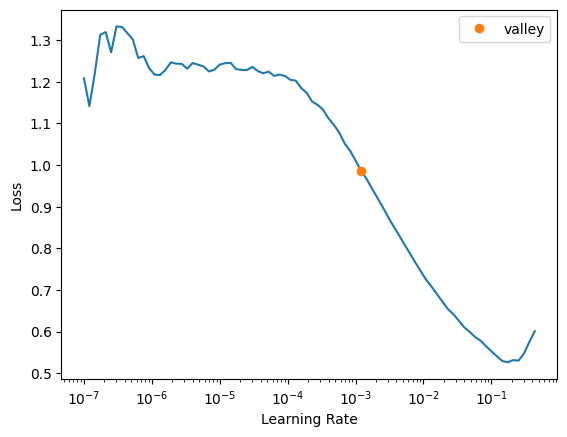

In [ ]:
print("fining best learning rate..")
suggested_lrs = learner.lr_find()

# Fine Tune

In [18]:
learner.fine_tune(4, base_lr= 4e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.869763,0.216788,0.063830,00:43


epoch,train_loss,valid_loss,error_rate,time
0,0.292136,0.413031,0.148936,01:07
1,0.179004,0.484092,0.085106,01:21
2,0.132699,0.464546,0.085106,01:23
3,0.104031,0.263262,0.053191,01:16


### Model performance

-- plot confusion matrix ----



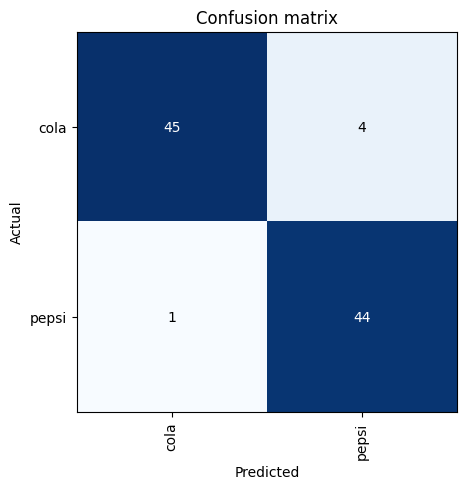

In [19]:
Intrep = ClassificationInterpretation.from_learner(learner)
print('-- plot confusion matrix ----\n')
Intrep.plot_confusion_matrix()

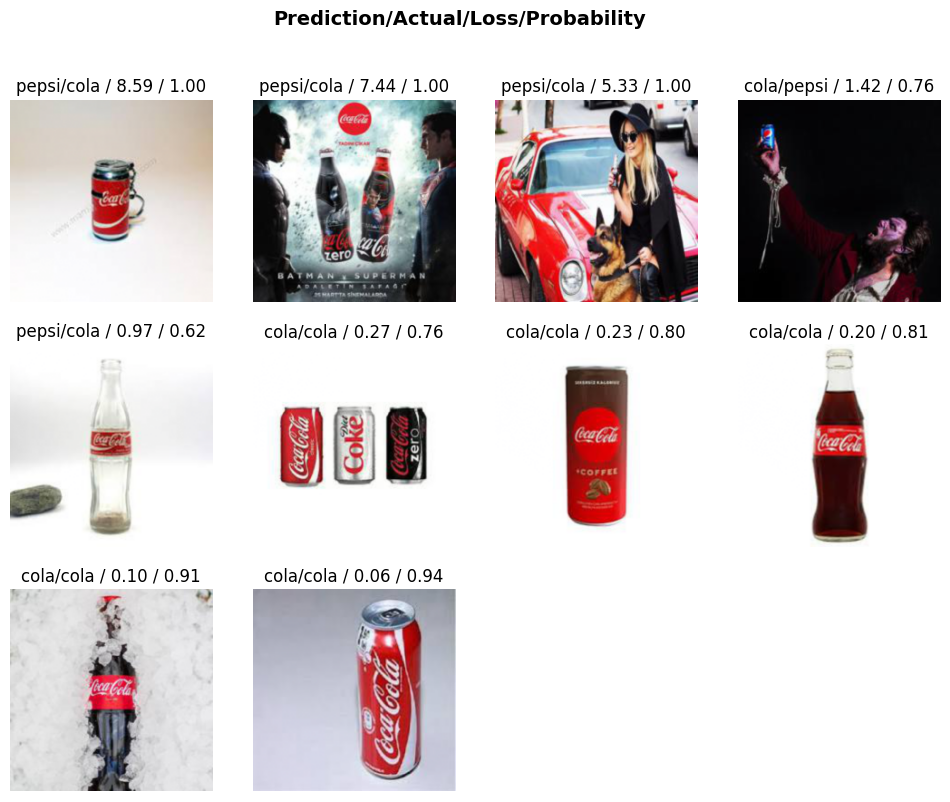

In [20]:
Intrep.plot_top_losses(10)

# Clean our dataset

In [ ]:
from fastai.vision.widgets import ImageClassifierCleaner

# here we can delete or relabel our image in train and validation data
cleaner = ImageClassifierCleaner(learner)
cleaner

In [ ]:
#remove data from our dataset
for idx,cat in cleaner.change() : shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
#change photo's label in our data
for idx in cleaner.delete() :cleaner.fns[idx].unlink()

### We need to create dataloader and learner again.

In [9]:
cleaned_dls = data_block.dataloaders((path/'train_images'))

In [10]:
cleaned_learner = vision_learner(cleaned_dls , resnet34, metrics = error_rate)

fining best learning rate..


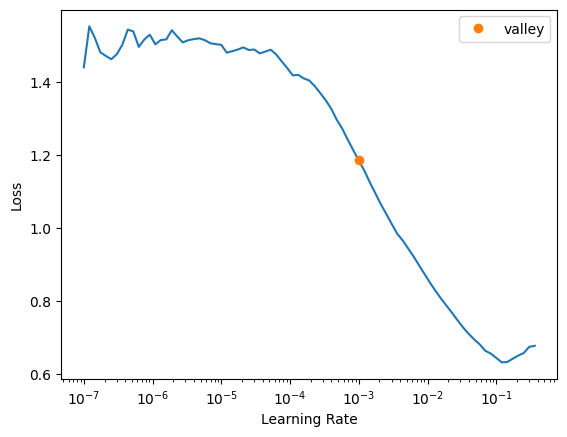

In [ ]:
print("fining best learning rate..")
suggested_lrs_clean = cleaned_dls.lr_find()

In [11]:
cleaned_learner.fine_tune(4, base_lr= 4e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.082318,0.230506,0.085106,00:35


epoch,train_loss,valid_loss,error_rate,time
0,0.260181,0.119450,0.063830,01:02
1,0.186153,0.188904,0.042553,00:55
2,0.128487,0.256574,0.042553,00:58
3,0.097566,0.153347,0.042553,00:57


In [ ]:
cleaned_intrep = ClassificationInterpretation.from_learner(cleaned_learner)

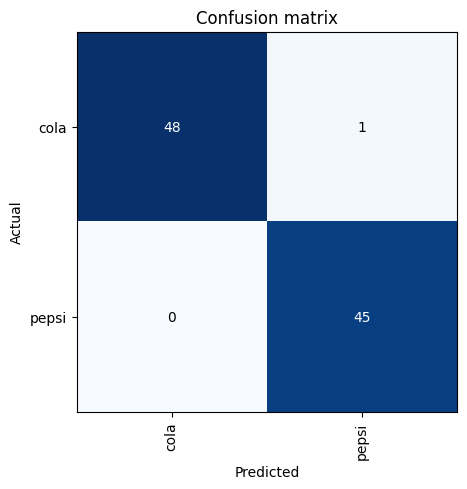

In [ ]:
cleaned_intrep.plot_confusion_matrix()

# Use Freezing and Unfreezing Concept

### 1.Train the model head (in Freeze mode) for 3 periods
#### We use a relatively high learning rate because only the last layers are trained

In [ ]:
print("Step 1: Training the model head (Frozen)...")
cleaned_learner.fit_one_cycle(3, 1e-3)

Step 1: Training the model head (Frozen)...


epoch,train_loss,valid_loss,error_rate,time
0,1.159186,190.108871,0.521277,00:59
1,0.974198,10778.264648,0.521277,01:08
2,0.820092,29.826977,0.531915,01:02


### 2.Unfreeze all layers of the model

In [13]:
print("Unfreeze all layers...")
cleaned_learner.unfreeze()

Unfreeze all layers...


### 3. Find the new learning rate for the entire model
#### The graph for this step will be different from the previous graph

SuggestedLRs(valley=0.0010000000474974513)

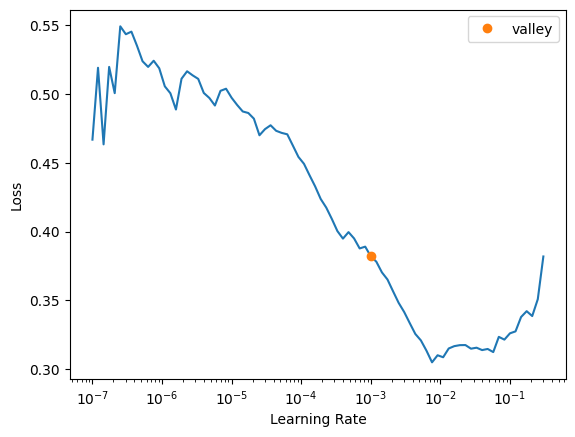

In [14]:
cleaned_learner.lr_find()

### 4. Train the entire model with discrete learning rates

In [ ]:

print("Step 2: Train the entire model (Unfrozen)...")
cleaned_learner.fit_one_cycle(8, lr_max=slice(1e-5, 4e-3))

Step 2: Train the entire model (Unfrozen)...


epoch,train_loss,valid_loss,error_rate,time


# Final evaluation on the Test Set

In [ ]:
# 1. Specify the path to your test folder
# (make sure the folder name is correct, e.g. test_images or test)
path_to_test_images = path/'test_images'

# 2. Create a test dataloader. The tags are read from the file name.
test_files = get_image_files(path_to_test_images)
test_dl = dls.test_dl(test_files)

# 3. Evaluate the final model with the test data
# We don't use the model we saved, but the cleaned_learner one that is in memory
# Because we want to evaluate the same model
print("Evaluating model on Test Set...")
results = cleaned_learner.validate(dl=test_dl)

# We print the final results
# Index 1 is for loss and index 2 is for error_rate
print(f"Final Loss on Test Set: {results[0]:.4f}")
print(f"Final Error Rate on Test Set: {results[1]:.4f}")
print(f"Final Accuracy on Test Set: {1 - results[1]:.4f}")